In [ ]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2 as cv
import pandas as pd
import sklearn.model_selection
from matplotlib import pyplot as plt
file_name ="drive/My Drive/Colab Notebooks/Dataset.csv"
dataset = pd.read_csv(file_name).astype('int64')
infections = dataset['New'].tolist()
deaths = dataset['Deaths'].tolist()

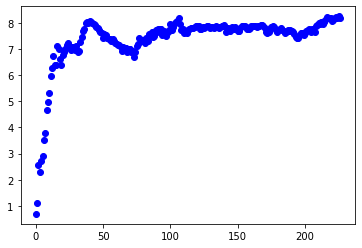

In [ ]:
x = range(len(infections))
X = np.c_[np.ones((len(x),1)),x]
t = np.log(infections)
T=t.reshape(len(infections),1)
X_train, X_test, y_train, y_test  = sklearn.model_selection.train_test_split(X, T, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
plt.plot(x,t,'o',color='blue')

In [ ]:
def update(x,t,theta,alpha):
  N= len(t)
  y=np.dot(x,theta)
  theta=theta - (alpha/(float(N)))*(x.T.dot((y-t)))
  return theta

In [ ]:
def train(x,t,theta,alpha,epochs):
  for e in range(epochs):
    theta = update(x,t,theta,alpha)
    if e% 10000 ==0:
      print("epoch: ", e, " loss: ", calc_cost(x,t,theta))
  return theta

In [ ]:
def calc_cost(x,t,theta):
  N = len(t)
  y=x.dot(theta)
  err = np.sum(np.square(y-t))/(float(2*N))
  return err

In [ ]:
theta = np.array([[0],[0]])
alpha = 0.0001
epochs = 100000
theta = train(X_train , y_train,theta , alpha , epochs)
training_data_cost = calc_cost(X_train , y_train,theta)
validating_data_cost = calc_cost(X_val, y_val,theta)
testing_data_cost = calc_cost(X_test, y_test,theta)
print("b : ",theta[0][0]," w: ",theta[1][0])
print("Training data cost : ",training_data_cost , "\nValidation data cost : ",validating_data_cost, "\nTest data cost : ",testing_data_cost)

epoch:  0  loss:  17.127835498348887
epoch:  10000  loss:  3.4882664376223995
epoch:  20000  loss:  2.2210040777240954
epoch:  30000  loss:  1.4588637330166043
epoch:  40000  loss:  1.0005072605040957
epoch:  50000  loss:  0.7248485089985359
epoch:  60000  loss:  0.5590654300227325
epoch:  70000  loss:  0.4593623401531401
epoch:  80000  loss:  0.39940021258887304
epoch:  90000  loss:  0.36333857451189916
b :  5.941786251071168  w:  0.011772347093689224
Training data cost :  0.3416525200039076 
Validation data cost :  0.46958583977885615 
Test data cost :  0.6598014394985087


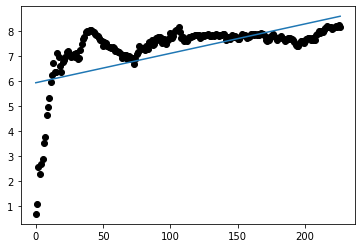

In [ ]:
plt.plot(x,t,"o",color = "black")
yy = np.dot(theta[1][0],x)+theta[0][0]
plt.plot(x,yy)